In [23]:
import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = 'used_car_sales.csv'  # Update this with the actual path to your file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(df.head())


       ID  pricesold  yearsold zipcode  Mileage               Make  \
0  137178       7500      2020   786**    84430               Ford   
1   96705      15000      2019   81006        0  Replica/Kit Makes   
2  119660       8750      2020   33449    55000             Jaguar   
3   80773      11600      2019   07852    97200               Ford   
4   64287      44000      2019   07728    40703            Porsche   

                Model  Year           Trim                   Engine  \
0             Mustang  1988             LX              5.0L Gas V8   
1  Jaguar Beck Lister  1958            NaN        383 Fuel injected   
2                 XJS  1995  2+2 Cabriolet  4.0L In-Line 6 Cylinder   
3             Mustang  1968          Stock           289 cu. in. V8   
4                 911  2002     Turbo X-50                     3.6L   

      BodyType  NumCylinders DriveType  
0        Sedan             0       RWD  
1  Convertible             8       RWD  
2  Convertible             6 

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# 伪造的数据加载过程
# data = pd.read_csv("used_car_sales.csv")

# 使用你给出的数据片段作为例子
data = pd.DataFrame({
    # ... your provided data ...
})

# 使用LabelEncoder转换非数值数据
le = LabelEncoder()
string_cols = ['Make', 'Model', 'Engine', 'Trim', 'BodyType', 'DriveType']

for col in string_cols:
    data[col] = data[col].fillna('Unknown')  # 将NaN替换为“Unknown”
    data[col] = le.fit_transform(data[col])  # 将字符串转换为数值

# 分离特征和标签
X = data.drop('pricesold', axis=1)
y = data['pricesold']

# 分离训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)


KeyError: 'Make'

In [12]:
# 打印所有列名
print(df.columns)


Index(['ID', 'pricesold', 'yearsold', 'zipcode', 'Mileage', 'Make', 'Model',
       'Year', 'Trim', 'Engine', 'BodyType', 'NumCylinders', 'DriveType'],
      dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

string_cols = ['Make', 'Model', 'Engine', 'Trim', 'BodyType', 'DriveType']

for col in string_cols:
    df[col] = df[col].fillna('Unknown')  # 将NaN替换为“Unknown”
    df[col] = le.fit_transform(df[col])  # 将字符串转换为数值

# 之后你可以继续分离特征和标签等后续操作


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# 加载数据
file_path = "C:/Users/cui10/workspace/course/508datamining/Project/used_car_sales.csv" 
df = pd.read_csv(file_path)

# 使用LabelEncoder转换非数值数据
le = LabelEncoder()
string_cols = ['Make', 'Model', 'Engine', 'Trim', 'BodyType', 'DriveType']

for col in string_cols:
    df[col] = df[col].fillna('Unknown')  # 将NaN替换为“Unknown”
    df[col] = le.fit_transform(df[col])  # 将字符串转换为数值

# 分离特征和标签
X = df.drop('pricesold', axis=1)
y = df['pricesold']

# 分离训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 预测并评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


ValueError: could not convert string to float: '793**'

In [23]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['zipcode'], dtype='object')


In [24]:
# 查找非数值的行
invalid_zipcodes = df['zipcode'].str.extractall(r'(\D)').groupby(level=0).size()
invalid_rows = invalid_zipcodes.index

print(f"Found {len(invalid_rows)} rows with invalid zipcodes")

# 替换非数值的zipcode为其众数
mode_zipcode = df['zipcode'].mode()[0]
df.loc[invalid_rows, 'zipcode'] = mode_zipcode

# 将zipcode转换为数值
df['zipcode'] = df['zipcode'].astype(int)


Found 38740 rows with invalid zipcodes


ValueError: cannot convert float NaN to integer

In [16]:
# 使用众数填充NaN
mode_zipcode = df['zipcode'].mode()[0]
df['zipcode'].fillna(mode_zipcode, inplace=True)

# 将zipcode转换为整数
df['zipcode'] = df['zipcode'].astype(int)

print(df.head())


ValueError: invalid literal for int() with base 10: '786**'

In [17]:
# 使用众数填充NaN
mode_zipcode = df['zipcode'].mode()[0]
df['zipcode'].fillna(mode_zipcode, inplace=True)

# 将不是5位数的zipcode转换为众数
df.loc[df['zipcode'].apply(lambda x: len(str(x)) != 5), 'zipcode'] = mode_zipcode

# 将zipcode转换为整数
df['zipcode'] = df['zipcode'].astype(int)

print(df.head())


ValueError: invalid literal for int() with base 10: '786**'

In [18]:
print(df.head())
print(df.info())

       ID  pricesold  yearsold zipcode  Mileage  Make  Model  Year   Trim  \
0  137178       7500      2020   786**    84430   154   2783  1988  13412   
1   96705      15000      2019   81006        0   344   2278  1958  21809   
2  119660       8750      2020   33449    55000   222   4032  1995    853   
3   80773      11600      2019   07852    97200   154   2783  1968  20529   
4   64287      44000      2019   07728    40703   331    654  2002  21639   

   Engine  BodyType  NumCylinders  DriveType  
0   13166      1633             0       2355  
1    9275       701             8       2355  
2   10367       701             6       2355  
3    4894       741             8       2355  
4    6817       741             6       1771  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122144 entries, 0 to 122143
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            122144 non-null  int64 
 1   pricesold 

In [19]:
print(df.describe())

                  ID      pricesold       yearsold       Mileage  \
count  122144.000000  122144.000000  122144.000000  1.221440e+05   
mean    85094.212397   10808.560715    2019.375467  1.404291e+06   
std     47786.970812   13987.295760       0.503671  3.335593e+07   
min         1.000000       0.000000    2018.000000  0.000000e+00   
25%     44547.250000    2950.000000    2019.000000  4.479225e+04   
50%     85555.500000    6500.000000    2019.000000  9.000000e+04   
75%    127078.500000   13800.000000    2020.000000  1.402000e+05   
max    165801.000000  404990.000000    2020.000000  1.235669e+09   

                Make          Model          Year           Trim  \
count  122144.000000  122144.000000  1.221440e+05  122144.000000   
mean      191.082542    2147.654203  3.959362e+03   16714.315234   
std       116.009765    1082.639231  1.984514e+05    6784.318266   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%        73.000000    1255.000000  1.977000e+

In [20]:
#特征工程

from sklearn.preprocessing import StandardScaler

# 提取特征和目标变量
X = df.drop('pricesold', axis=1)
y = df['pricesold']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


ValueError: could not convert string to float: '786**'

In [21]:
# 数据分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


NameError: name 'X_scaled' is not defined

In [22]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

# 初始化模型，这里使用k=5作为示例
knn = KNeighborsRegressor(n_neighbors=5)

# 训练模型
knn.fit(X_train, y_train)


ValueError: could not convert string to float: '793**'

In [35]:
# 模型评估
import numpy as np

from sklearn.metrics import mean_squared_error

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 178499098.02169552
Root Mean Squared Error: 13360.355460155075


In [36]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# 设置要测试的k值范围
param_grid = {'n_neighbors': list(range(1, 31))}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'n_neighbors': 19}


In [37]:
# 使用最佳参数初始化KNN
knn_best = KNeighborsRegressor(n_neighbors=19)

# 训练模型
knn_best.fit(X_train, y_train)

# 在测试数据上进行预测
y_pred = knn_best.predict(X_test)

# 计算MSE和RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 172158588.0608046
Root Mean Squared Error: 13120.921768717493


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbm = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
# 使用最佳参数进行预测
best_gbm = grid_search.best_estimator_
y_pred_gbm = best_gbm.predict(X_test)

# 评估模型性能
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
print(f"Mean Squared Error (GBM): {mse_gbm}")
print(f"Root Mean Squared Error (GBM): {rmse_gbm}")



Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Mean Squared Error (GBM): 78450523.91267371
Root Mean Squared Error (GBM): 8857.230036115903


In [41]:
#将问题转化为分类问题：
median_price = df['pricesold'].median()
df['price_category'] = df['pricesold'].apply(lambda x: 1 if x > median_price else 0)


In [42]:
# 分割数据：
X = df.drop(columns=['ID', 'pricesold', 'price_category'])
y = df['price_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


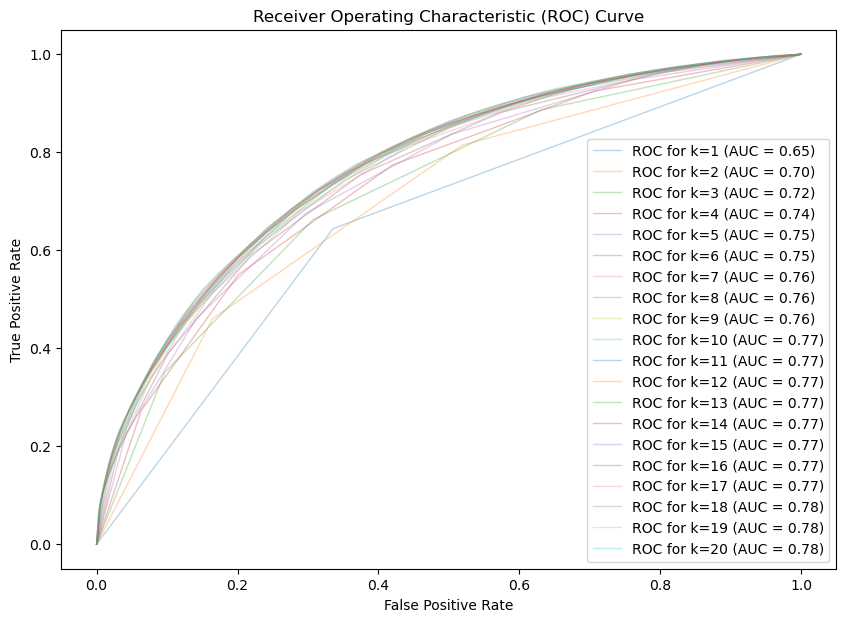

In [45]:
#使用GridSearchCV寻找最佳参数并绘制ROC曲线：

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

k_values = [i for i in range(1, 21)]
param_grid = {'n_neighbors': k_values}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

plt.figure(figsize=(10, 7))

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_prob = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC for k={i} (AUC = {roc_auc:.2f})')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [49]:
best_k = grid_search.best_params_['n_neighbors']
print (best_k)

20


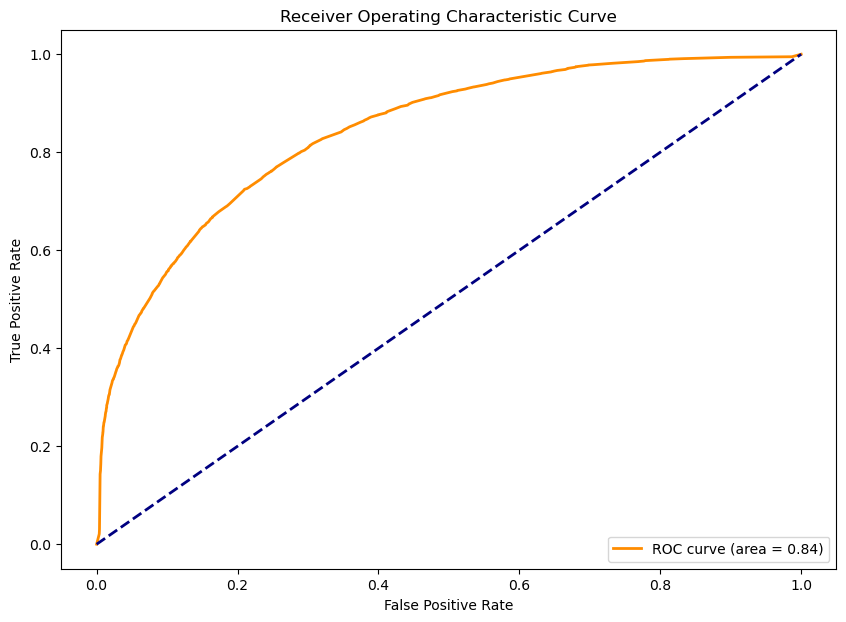

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 决策树模型训练
clf = DecisionTreeClassifier(max_depth=10)  # 设置你想要的参数
clf.fit(X_train, y_train)

# 预测概率
y_prob = clf.predict_proba(X_test)[:, 1]

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {'max_depth': list(range(1, 21))}

# 初始化决策树分类器
clf = DecisionTreeClassifier()

# 使用交叉验证搜索最佳参数
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best max_depth:", grid_search.best_params_['max_depth'])


Best max_depth: 12


In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# 初始化决策树分类器
clf = DecisionTreeClassifier()

# 使用交叉验证搜索最佳参数
grid_search = GridSearchCV(clf, param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

# 获取交叉验证结果
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 21)), mean_test_scores, marker='o', label="Mean CV Test Score")
plt.plot(list(range(1, 21)), mean_train_scores, marker='o', linestyle='--', color='red', label="Mean CV Train Score")
plt.xlabel('max_depth')
plt.ylabel('Mean Score')
plt.title('Mean Cross Validation Score vs. max_depth')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.tree import DecisionTreeClassifier


NameError: name 'GridSearchCV' is not defined

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# 创建决策树回归模型
dt = DecisionTreeRegressor(max_depth=5)  # 你可以调整max_depth和其他参数
dt.fit(X_train, y_train)

# 使用模型在测试数据上进行预测
y_pred_dt = dt.predict(X_test)

# 计算MSE和RMSE
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(f"Decision Tree: Mean Squared Error: {mse_dt}")
print(f"Decision Tree: Root Mean Squared Error: {rmse_dt}")


Decision Tree: Mean Squared Error: 0.17720378253080277
Decision Tree: Root Mean Squared Error: 0.42095579640955505


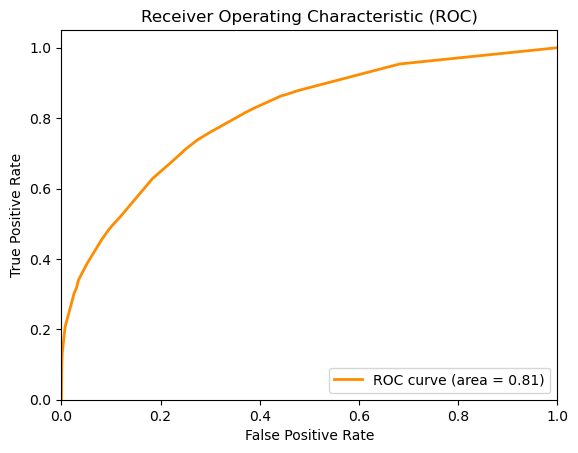

In [69]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5)  # 根据需要调整max_depth或其他参数
tree_model.fit(X_train, y_train)

# 然后你可以计算FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
# 画ROC曲线的代码

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.7318351140038479
[[8980 3391]
 [3160 8898]]


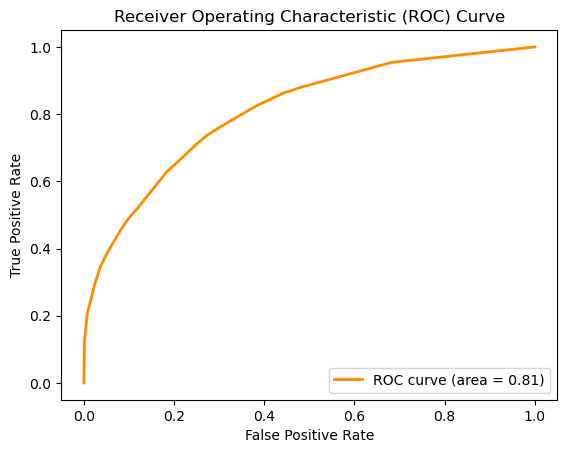

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. 训练模型
tree_classifier = DecisionTreeClassifier(max_depth=5)
tree_classifier.fit(X_train, y_train)

# 2. 模型评估
y_pred = tree_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))

# 3. 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, tree_classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 选择k值，例如k=5
k = 19
knn = KNeighborsClassifier(n_neighbors=k)

# 使用训练数据集训练模型
knn.fit(X_train, y_train)

# 使用模型对测试数据集进行预测
y_pred = knn.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7037537353145851
